Topical Data Analysis

In [1]:
  library(tidyverse)
  library(reshape2)
  library(fiftystater)
library(magrittr)
library(repr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths


Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



# PLOT 1

Parsed with column specification:
cols(
  Week = col_integer(),
  `Total A` = col_integer(),
  `Total B` = col_integer(),
  `Percent Positive A` = col_double(),
  `Percent Positive B` = col_double(),
  `Total # Tested` = col_integer(),
  `% Positive` = col_double()
)
Using Week as id variables
Warning message:
“Removed 32 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”

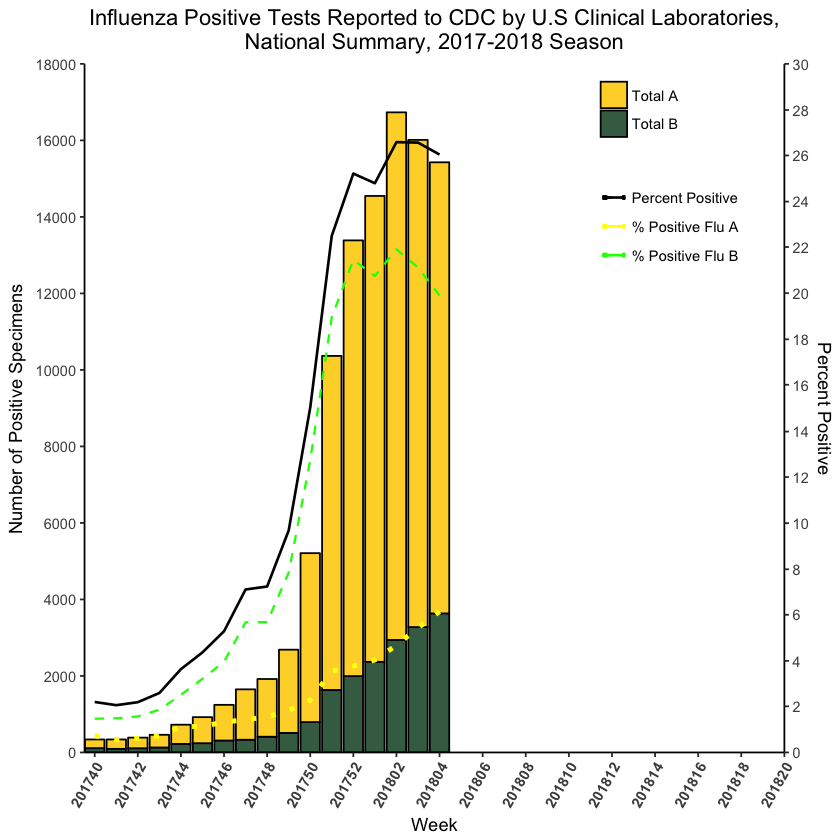

In [2]:

# Reading in Data for Graph 1
X1_Influenza_Summary <- read_csv("1 - Influenza Summary.csv")

#b=data.frame(Week=c(201805,201806,201807,201808,201809,201810,201811,201812,201813,201814,201815,201816,201817,201818,201819,201820), `A (H3N2v)`=NA, `A (H1N1)pdm09`=NA, `A(H3)`=NA, `A (unable to sub-type)`=NA, `A(Subtyping not performed)`=NA, `B`=NA, `BVIC`=NA, `BYAM`=NA, `Total # Tested`=NA)
b=data.frame(Week=c(201805,201806,201807,201808,201809,201810,201811,201812,201813,201814,201815,201816,201817,201818,201819,201820), `Total A`=NA, `Total B`=NA, `Percent Positive A`=NA, `Percent Positive B`=NA, `Total # Tested`=NA, `% Positive`=NA)

colnames(b) <- colnames(X1_Influenza_Summary)
X1_Influenza_Summary <- rbind(X1_Influenza_Summary,b)

X1_Influenza_Summary$Week <- factor(X1_Influenza_Summary$Week, levels=unique(X1_Influenza_Summary$Week))
melted <- X1_Influenza_Summary %>% melt
meltFrame <- X1_Influenza_Summary %>% select(Week, `Total A`, `Total B`)
meltedFrame <- melt(meltFrame, id.vars = "Week")




group.colors <- c(`Total A` = "#ffd533", `Total B` = "#426d53")

ggplot(data=X1_Influenza_Summary, aes(x=X1_Influenza_Summary$Week)) +
  #geom_col(aes(y=X1_Influenza_Summary$`Total A`), col = 'black', fill = '#ffd533') +
  #geom_col(aes(y=X1_Influenza_Summary$`Total B`), col = 'black', fill = '#426d53') +
  geom_bar(data = meltedFrame, aes(x=Week, y=value, fill=variable), color='black', stat="identity") +
  geom_line(aes(group=1, y=X1_Influenza_Summary$`Percent Positive A`*600, col = 'yellow'), size = 0.65, linetype= 'dashed') +
  geom_line(aes(group=1, y=X1_Influenza_Summary$`Percent Positive B`*600, col = 'green'), size = 1.4, linetype = 'dotted') +
  geom_line(aes(group=1, y=X1_Influenza_Summary$`% Positive`*600, col = 'black'), size = 0.75) +
  theme_classic() +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S Clinical Laboratories,\nNational Summary, 2017-2018 Season") +
  scale_colour_manual(name = 'thecolor', 
                      values =c('green'='yellow','black'='black', 'yellow'='green'), labels = c('Percent Positive','% Positive Flu A', '% Positive Flu B')) +
  scale_fill_manual(name = 'thecolor', values=group.colors) +
  scale_x_discrete(breaks = X1_Influenza_Summary$Week[seq(1,33,2)], expand = c(-.016,0)) +
  xlab("Week") +
  ylab("Number of Positive Specimens") +
  scale_y_continuous(expand = c(0, 0), breaks=seq(0,18000,2000), sec.axis = sec_axis(~./600, breaks = seq(0,30,2), name="Percent Positive")) +
  coord_cartesian(ylim=c(0,18000)) +
  expand_limits(x = 0, y = 0) +
  theme(axis.text.x = element_text(angle = 60, hjust = 1, face='bold'), plot.title = element_text(hjust = 0.5), legend.title=element_blank(), legend.justification = c(1, 1), legend.position = c(0.95, 1))

# PLOT 2

Parsed with column specification:
cols(
  Week = col_integer(),
  H3N2v = col_integer(),
  `A (H1N1)pdm09` = col_integer(),
  `A(H3N2)` = col_integer(),
  `A (unable to sub-type)` = col_integer(),
  `A (subtyping not performed)` = col_integer(),
  `B (lineage not performed)` = col_integer(),
  `B (Victoria Lineage)` = col_integer(),
  `B (Yamagata Lineage)` = col_integer(),
  `Total # Tested` = col_integer()
)
Using Week as id variables
Warning message:
“Removed 112 rows containing missing values (position_stack).”

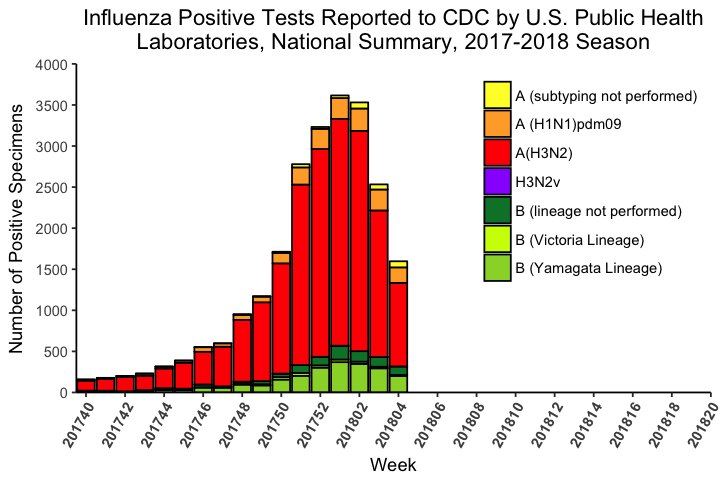

In [10]:

  X2_Positive_Tested <- read_csv("2 - Positive Tested.csv")
  X2_Positive_Tested <- X2_Positive_Tested %>% select(-`A (unable to sub-type)`)
  b=data.frame(Week=c(201805,201806,201807,201808,201809,201810,201811,201812,201813,201814,201815,201816,201817,201818,201819,201820), `H3N2v`=NA, `A (H1N1)pdm09`=NA, `A(H3N2)`=NA, `A (subtyping not performed)`=NA, `B (lineage not performed)`=NA, `B (Victoria Lineage`=NA, `B (Yamagata Lineage`=NA, `Total # Tested`=NA)
  
  #b=data.frame(Week=c(201805,201806,201807,201808,201809,201810,201811,201812,201813,201814,201815,201816,201817,201818,201819,201820), `Total A`=NA, `Total B`=NA, `Percent Positive A`=NA, `Percent Positive B`=NA, `Total # Tested`=NA, `% Positive`=NA)
  colnames(b) <- colnames(X2_Positive_Tested)
  X2_Positive_Tested <- rbind(X2_Positive_Tested,b)
  X2_Positive_Tested <- X2_Positive_Tested[,c(1,5,3,4,2,6,7,8,9)]
  
  X2_Positive_Tested$Week <- factor(X2_Positive_Tested$Week, levels=unique(X2_Positive_Tested$Week))
  melted <- X2_Positive_Tested %>% melt
  
  meltFrame <- X2_Positive_Tested %>% select(-`Total # Tested`)
  meltedFrame <- melt(meltFrame, id.vars = "Week")
  
  group.colors <- c(`A (subtyping not performed)` = "#ffff33", `H3N2v` = "#9900ff", `A (H1N1)pdm09`="#ffaa33", `A(H3N2)` = "#ff0000", `B (lineage not performed)` = "#008033", `B (Victoria Lineage)`="#ccff00", `B (Yamagata Lineage)`="#99d533")
  options(repr.plot.width=6, repr.plot.height=4)
  ggplot(data=X2_Positive_Tested, aes(x=X2_Positive_Tested$Week)) +
    geom_bar(data = meltedFrame, aes(x=Week, y=value, fill=variable), color='black', stat="identity") +
    theme_classic() +
    ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2017-2018 Season") +
    scale_fill_manual(values=group.colors) +
    expand_limits(x = 0, y = 0) +
    scale_x_discrete( breaks = X2_Positive_Tested$Week[seq(1,33,2)], expand = c(-0.029,0)) +
    xlab("Week") +
    ylab("Number of Positive Specimens") +
    scale_y_continuous(expand = c(0 ,0), breaks=seq(0,4000,500)) +
    coord_cartesian(ylim=c(0,4000)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, face='bold'), plot.title = element_text(hjust = 0.5), legend.title=element_blank(), legend.justification = c(1, 1), legend.position = c(1, 1))

# PLOT 4


Parsed with column specification:
cols(
  Year = col_integer(),
  Week = col_integer(),
  `Percent of Deaths Due to Pneumonia and Influenza` = col_double(),
  Expected = col_double(),
  Threshold = col_double(),
  `All Deaths` = col_integer(),
  `Pneumonia Deaths` = col_integer(),
  `Influenza Deaths` = col_integer()
)


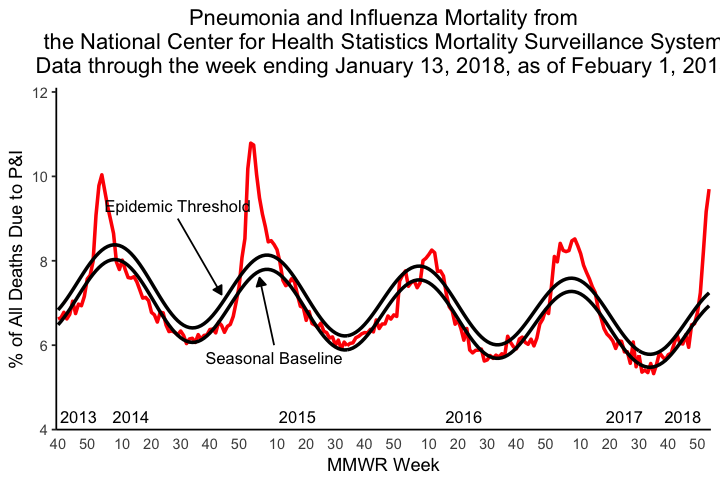

In [11]:
X4_Mortality <- read_csv("4 - Mortality.csv")
X4_Mortality <- X4_Mortality %>% select(-`All Deaths`, -`Pneumonia Deaths`, -`Influenza Deaths`)

getLimitIndex <- 402013 %>% match(X4_Mortality$Week) #209
getLimitIndex <- 209
getLength <- X4_Mortality %>% dim %>% extract(1)
X4_Mortality <- X4_Mortality[getLimitIndex:getLength,]

savedWeeks <- X4_Mortality$Week

X4_Mortality$Week <- as.numeric(paste(X4_Mortality$Week, X4_Mortality$Year, sep = ""))
X4_Mortality <- X4_Mortality %>% select(-Year)


X4_Mortality$Week <- factor(X4_Mortality$Week, unique(X4_Mortality$Week))


melted <- X4_Mortality %>% melt(id="Week")

group.colors <- c(`Percent of Deaths Due to Pneumonia and Influenza` = "red", `Expected` = "black", `Threshold` = "black")

options(repr.plot.width=6, repr.plot.height=4)
ggplot(data=melted, aes(group = variable, x=Week, y=value, color=variable)) +
  geom_line(size=1) +
  theme_classic() +
  theme(legend.position="none", plot.title = element_text(hjust = 0.5), axis.ticks.x = element_blank()) +
  scale_color_manual(values=group.colors) +
  scale_x_discrete(breaks=X4_Mortality$Week[savedWeeks %in% seq(0,51, 10)], labels=savedWeeks[savedWeeks %in% seq(0,51, 10)]) +
  scale_y_continuous(breaks=seq(0,12,2), expand=c(0,0)) +
  coord_cartesian(ylim=c(4,12.1)) +
  xlab("MMWR Week") +
  ylab("% of All Deaths Due to P&I") +
  ggtitle("Pneumonia and Influenza Mortality from\nthe National Center for Health Statistics Mortality Surveillance System\nData through the week ending January 13, 2018, as of Febuary 1, 2018") +
  annotate("segment", x = 42, xend = 57, y = 9, yend = 7.2, colour = "black", size=0.5, alpha=1, arrow=arrow(type="closed",length=unit(0.20,"cm"))) +
  annotate("segment", x = 75, xend = 70, y = 6.0, yend = 7.6, colour = "black", size=0.5, alpha=1, arrow=arrow(type="closed",length=unit(0.20,"cm"))) +
  annotate(geom="text", x=75, y=5.7, label="Seasonal Baseline", color="black", size = 3.5) +
  annotate(geom="text", x=42, y=9.3, label="Epidemic Threshold", color="black", size=3.5) +
  annotate(geom="text", x=8, y=4.3, label="2013", color="black", size=3.5) +
  annotate(geom="text", x=26, y=4.3, label="2014", color="black", size=3.5) +
  annotate(geom="text", x=83, y=4.3, label="2015", color="black", size=3.5) +
  annotate(geom="text", x=140, y=4.3, label="2016", color="black", size=3.5) +
  annotate(geom="text", x=195, y=4.3, label="2017", color="black", size=3.5) +
  annotate(geom="text", x=215, y=4.3, label="2018", color="black", size=3.5)




# PLOT 5

Parsed with column specification:
cols(
  Season = col_character(),
  Week = col_character(),
  `Deaths Reported Current Week` = col_integer(),
  `Deaths Reported Previous Week` = col_integer()
)


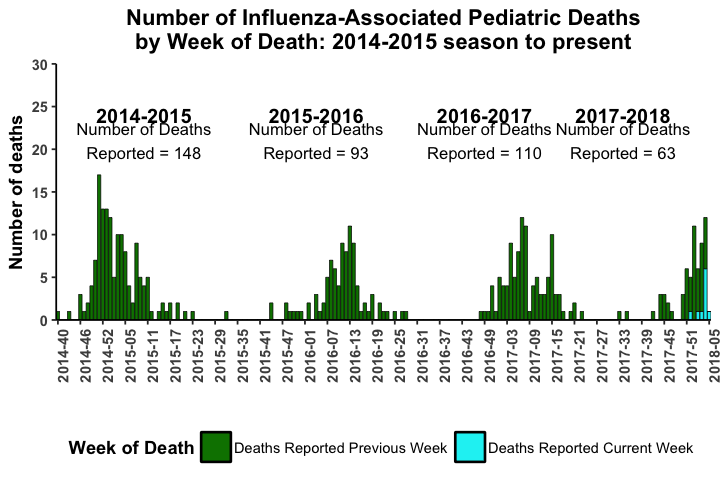

In [15]:
X5_Pediatric_Deaths <- read_csv("5 - Pediatric Deaths.csv")
X5_Pediatric_Deaths <- X5_Pediatric_Deaths %>% select(-Season)

X5_Pediatric_Deaths <- X5_Pediatric_Deaths[1:(209-34),]

X5_Pediatric_Deaths$Week <- factor(X5_Pediatric_Deaths$Week, unique(X5_Pediatric_Deaths$Week))

melted <- X5_Pediatric_Deaths %>% melt(id="Week")

group.colors <- c(`Deaths Reported Current Week` = "#00f1f4", `Deaths Reported Previous Week` = "#008000")
melted$variable <- factor(melted$variable, levels = c("Deaths Reported Previous Week", "Deaths Reported Current Week"))

ggplot() +
  geom_bar(data = melted, aes(x=Week, y=value, fill=variable), stat="identity", color = 'black', size=0.2) +
  theme_classic() +
  scale_fill_manual(values=group.colors) +
  scale_x_discrete( breaks = X5_Pediatric_Deaths$Week[seq(1,209,6)], expand = c(0,0)) +
  scale_y_continuous(expand = c(0 ,0), breaks=seq(0,30,5)) +
  coord_cartesian(ylim=c(0,30)) +
  theme(axis.title.y = element_text(face='bold'), axis.text.y = element_text(face='bold'), axis.text.x = element_text(angle = 90, hjust = 1, face='bold'), plot.title = element_text(face='bold', hjust = 0.5), legend.position = 'bottom', legend.title = element_text(face='bold'), legend.key = element_rect(size=1)) +
  labs(fill="Week of Death")  +
  xlab("") +
  ylab("Number of deaths") +
  ggtitle("Number of Influenza-Associated Pediatric Deaths\nby Week of Death: 2014-2015 season to present") +
  annotate(geom="text", x=24, y=24, label="2014-2015", color="black", size=4.2, fontface=2) +
  annotate(geom="text", x=24, y=21, label="Number of Deaths\nReported = 148", color="black", size=3.5) +
  annotate(geom="text", x=70, y=24, label="2015-2016", color="black", size=4.2, fontface=2) +
  annotate(geom="text", x=70, y=21, label="Number of Deaths\nReported = 93", color="black", size=3.5) +
  annotate(geom="text", x=115, y=24, label="2016-2017", color="black", size=4.2, fontface=2) +
  annotate(geom="text", x=115, y=21, label="Number of Deaths\nReported = 110", color="black", size=3.5) +
  annotate(geom="text", x=152, y=24, label="2017-2018", color="black", size=4.2, fontface=2) +
  annotate(geom="text", x=152, y=21, label="Number of Deaths\nReported = 63", color="black", size=3.5)




# PLOT 6

Parsed with column specification:
cols(
  `Region Type` = col_character(),
  Region = col_character(),
  Year = col_integer(),
  Week = col_integer(),
  `% Weighted ILI` = col_double(),
  `% Unweighted ILI` = col_double(),
  `Age 0-4` = col_integer(),
  `Age 25-49` = col_integer(),
  `Age 25-64` = col_character(),
  `Age 5-24` = col_integer(),
  `Age 50-64` = col_integer(),
  `Age 65` = col_integer(),
  `ILI Total` = col_integer(),
  `Number of Providers` = col_integer(),
  `Total Patients` = col_integer()
)
Warning message:
“Removed 34 rows containing missing values (geom_path).”Warning message:
“Removed 346 rows containing missing values (geom_point).”

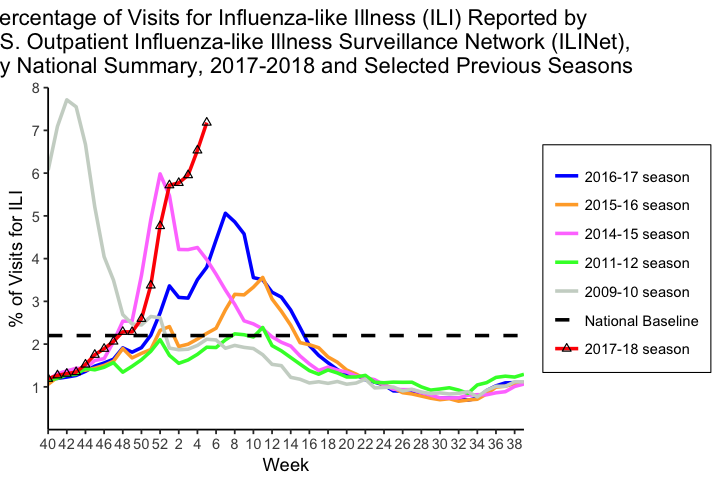

In [16]:
rm(list=ls())
library(tidyverse)
library(reshape2)

X6_Influenza_Like_Illness <- read_csv("6 - Influenza-Like Illness.csv")
X6_Influenza_Like_Illness <- X6_Influenza_Like_Illness %>% select(Year, Week, `% Weighted ILI`)
#X6_Influenza_Like_Illness$Year[1:52] <- "2009-10 season"
#X6_Influenza_Like_Illness$Year[53:104] <- "2011-12 season"
#X6_Influenza_Like_Illness$Year[105:156] <- "2014-15 season"
#X6_Influenza_Like_Illness$Year[157:208] <- "2015-16 season"
#X6_Influenza_Like_Illness$Year[209:260] <- "2016-17 season"
#X6_Influenza_Like_Illness$Year[261:282] <- "2017-18 season"

weeks <- seq(40,52,1)
weeks <- c(weeks, seq(1,39,1))

nulls <- seq(1,30,1)
nulls <- NULL


newDF <- data.frame('Week'=weeks, '2009-10 season' = X6_Influenza_Like_Illness$`% Weighted ILI`[1:52],
                    '2011-12 season' = X6_Influenza_Like_Illness$`% Weighted ILI`[53:104],
                    '2014-15 season' = X6_Influenza_Like_Illness$`% Weighted ILI`[105:156],
                    '2015-16 season' = X6_Influenza_Like_Illness$`% Weighted ILI`[157:208],
                    '2016-17 season' = X6_Influenza_Like_Illness$`% Weighted ILI`[209:260],
                    '2017-18 season' = c(X6_Influenza_Like_Illness$`% Weighted ILI`[261:282], rep(NA, 30)),
                    'baseline' = rep(2.2, 52))

colnames(newDF) <- c('Week', '2009-10 season', '2011-12 season', '2014-15 season', '2015-16 season','2016-17 season', '2017-18 season', 'National Baseline')


newDF$Week <- factor(newDF$Week, unique(newDF$Week))

#melted <- X6_Influenza_Like_Illness %>% melt(id="Week")

melted <- newDF %>% melt(id="Week")

melted$variable <- factor(melted$variable, levels = c("2016-17 season", "2015-16 season", "2014-15 season", "2011-12 season", "2009-10 season", "National Baseline", "2017-18 season"))

group.colors <- c(`2016-17 season` = '#0000ff', `2015-16 season` = '#ffaa33', `2014-15 season` = '#ff80ff', `2011-12 season` = '#33ff33', `2009-10 season` = '#ccd5cc', `National Baseline` = 'black', `2017-18 season` = 'red')

ggplot(data=melted) +
  geom_line(size=1, aes(group=variable, x=Week, y=value, color=variable, linetype=variable)) +
  geom_point(aes(x=Week, y=value, shape=variable)) +
  scale_shape_manual(values=c(NA,NA,NA,NA,NA,NA,2)) +
  ggtitle("Percentage of Visits for Influenza-like Illness (ILI) Reported by\nthe U.S. Outpatient Influenza-like Illness Surveillance Network (ILINet),\nWeekly National Summary, 2017-2018 and Selected Previous Seasons") +
  ylab("% of Visits for ILI") +
  theme_classic() +
  scale_x_discrete(expand=c(0,0), breaks = c(seq(40,52,2), seq(2,39, 2))) +
  scale_y_continuous(expand=c(0,0), breaks = seq(1,8,1)) +
  coord_cartesian(ylim=c(0,8)) +
  scale_color_manual(values=group.colors) +
  scale_linetype_manual(values=c("solid", "solid", "solid", "solid", "solid", "dashed","solid")) +
  theme(legend.title = element_blank(), plot.title = element_text(hjust = 0.5), legend.background = element_rect(color = "black", size = 0.3, linetype = "solid"))

# Heatmap

Parsed with column specification:
cols(
  STATENAME = col_character(),
  URL = col_character(),
  WEBSITE = col_character(),
  ACTIVITY.LEVEL = col_character(),
  ACTIVITY.LEVEL.LABEL = col_character(),
  WEEKEND = col_character(),
  WEEK = col_integer(),
  SEASON = col_character()
)


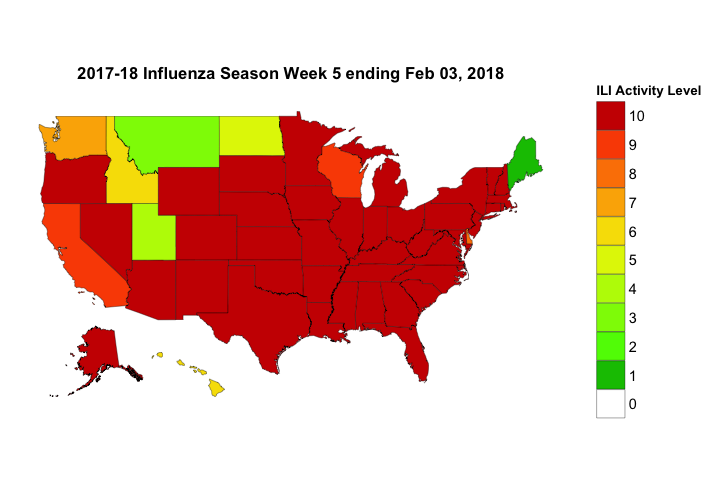

In [25]:
library(fiftystater)

library(mapproj)

X7_Flu_Heat_Map <- read_csv("7 - Flu Heat Map.csv")
X7_Flu_Heat_Map <- X7_Flu_Heat_Map %>% select(STATENAME, ACTIVITY.LEVEL, ACTIVITY.LEVEL.LABEL)

copySeries <- X7_Flu_Heat_Map$ACTIVITY.LEVEL
newSeries <- seq(1,54,1)
for (i in seq(1,54)) {
  process <-copySeries[i] %>% strsplit(" ") %>% extract2(1) %>% extract(2) %>% as.integer()
  newSeries[i] <- process
}
X7_Flu_Heat_Map$ACTIVITY.LEVEL <- newSeries %>% factor(levels = c("10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"))

X7_Flu_Heat_Map$STATENAME <- X7_Flu_Heat_Map$STATENAME %>% tolower()


ggplot(X7_Flu_Heat_Map, aes(fill=ACTIVITY.LEVEL, map_id=STATENAME)) +
  geom_map(map=fifty_states, color = 'black', size = 0.1) +
  expand_limits(x=fifty_states$long, y=fifty_states$lat) +
  coord_map() +
  theme_classic() +
  ggtitle("2017-18 Influenza Season Week 5 ending Feb 03, 2018") +
  scale_fill_manual(drop=FALSE, name = "ILI Activity Level", values = c("#cc0000", "#fa4f00", "#fc8200", "#fcb100", "#f7df00", "#e0f500", "#baf700", "#8cf700", "#5bf700", "#00c200", "white")) +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank(), axis.title.y = element_blank(),
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        line = element_blank(),plot.title = element_text(hjust = 0.5, face = 'bold', size = 10),
        #legend.text = element_blank(),
        legend.title = element_text(face = 'bold', size = 8))